#### Recurrent Neural Network (RNN) using TensorFlow/Keras
#### IMDB dataset (movie reviews with binary sentiment labels) 

Epoch 1/5


C:\Users\baron\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 47ms/step - accuracy: 0.5541 - loss: 0.6771 - val_accuracy: 0.7676 - val_loss: 0.4838
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.7437 - loss: 0.5191 - val_accuracy: 0.8170 - val_loss: 0.4262
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.8651 - loss: 0.3185 - val_accuracy: 0.7708 - val_loss: 0.4792
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9010 - loss: 0.2451 - val_accuracy: 0.8202 - val_loss: 0.4828
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 44ms/step - accuracy: 0.9584 - loss: 0.1171 - val_accuracy: 0.7508 - val_loss: 0.6652
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.7495 - loss: 0.6599
Test Accuracy: 75.14%


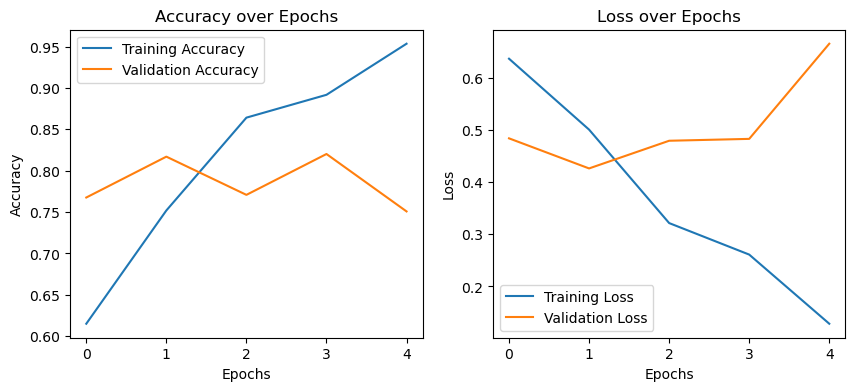

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
Review: The movie was great, I would watch again.
Predicted Sentiment: Positive

Review: Bad movie, please don't waste your time watching.
Predicted Sentiment: Positive



In [2]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models, datasets, preprocessing
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and preprocess the IMDB dataset
def load_data():
    # Load dataset with a vocabulary size of 10000
    (train_data, train_labels), (test_data, test_labels) = datasets.imdb.load_data(num_words=10000)

    train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=200)
    test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=200)

    return train_data, train_labels, test_data, test_labels

# Step 2: Build the RNN model
def create_rnn_model():
    model = models.Sequential([
        layers.Embedding(input_dim=10000, output_dim=64, input_length=200),
        layers.SimpleRNN(64, return_sequences=False),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Step 3: Compile and train the RNN
def train_model(model, train_data, train_labels):
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_data, train_labels, epochs=5,
                        validation_split=0.2, batch_size=64)
    return history

# Step 4: Evaluate the model
def evaluate_model(model, test_data, test_labels):
    test_loss, test_accuracy = model.evaluate(test_data, test_labels)
    print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
    return test_accuracy

# Step 5: Visualize training history
def plot_training_history(history):
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title("Accuracy over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Loss over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# Test new data
def predict_new_data(model, word_index):
    new_reviews = [
        "The movie was great, I would watch again.",
        "Bad movie, please don't waste your time watching."
    ]

    def encode_review(review):
        tokens = [word_index.get(word.lower(), 0) for word in review.split()]
        return tokens

    sequences = [encode_review(review) for review in new_reviews]
    padded_sequences = preprocessing.sequence.pad_sequences(sequences, maxlen=200)

    # Predict sentiment
    predictions = model.predict(padded_sequences)
    sentiments = ['Positive' if p > 0.5 else 'Negative' for p in predictions]

    for review, sentiment in zip(new_reviews, sentiments):
        print(f"Review: {review}\nPredicted Sentiment: {sentiment}\n")

# Main workflow
if __name__ == "__main__":
    # Load Data
    train_data, train_labels, test_data, test_labels = load_data()

    word_index = datasets.imdb.get_word_index()

    rnn_model = create_rnn_model()
    history = train_model(rnn_model, train_data, train_labels)

    evaluate_model(rnn_model, test_data, test_labels)

    plot_training_history(history)
    predict_new_data(rnn_model, word_index)
